<a href="https://colab.research.google.com/github/ProfessorDong/DSP-Course-Examples/blob/master/z_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

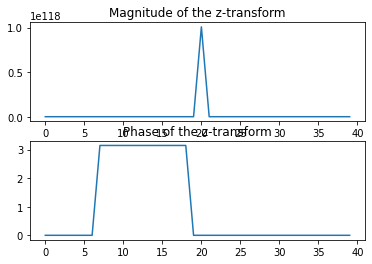

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signal
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 1])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of x at the current value of z
        Xz = np.sum(x * (z ** (-np.arange(len(x)))))
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the input signal
X = z_transform(x)

# Plot the magnitude and phase of the z-transform
plt.subplot(2, 1, 1)
plt.plot(np.abs(X))
plt.title('Magnitude of the z-transform')
plt.subplot(2, 1, 2)
plt.plot(np.angle(X))
plt.title('Phase of the z-transform')
plt.show()


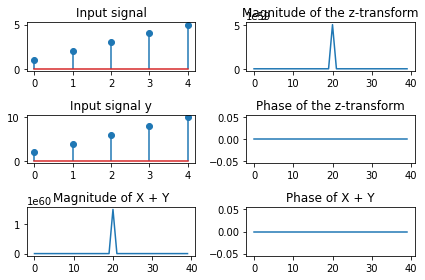

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signal
x = np.array([1, 2, 3, 4, 5])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of x at the current value of z
        Xz = np.sum(x * (z ** (-np.arange(len(x)))))
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the input signal
X = z_transform(x)

# Plot the input signal
plt.subplot(3, 2, 1)
plt.stem(x)
plt.title('Input signal')

# Plot the magnitude and phase of the z-transform
plt.subplot(3, 2, 2)
plt.plot(np.abs(X))
plt.title('Magnitude of the z-transform')
plt.subplot(3, 2, 4)
plt.plot(np.angle(X))
plt.title('Phase of the z-transform')

# Demonstrate linearity of z-transform
y = np.array([2, 4, 6, 8, 10])
Y = z_transform(y)
plt.subplot(3, 2, 3)
plt.stem(y)
plt.title('Input signal y')
plt.subplot(3, 2, 5)
plt.plot(np.abs(X + Y))
plt.title('Magnitude of X + Y')
plt.subplot(3, 2, 6)
plt.plot(np.angle(X + Y))
plt.title('Phase of X + Y')

plt.tight_layout()
plt.show()


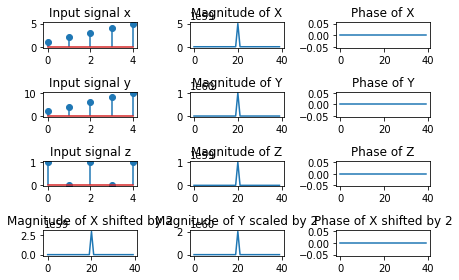

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signals
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
z = np.array([1, 0, 1, 0, 1])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of x at the current value of z
        Xz = np.sum(x * (z ** (-np.arange(len(x)))))
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the input signals
X = z_transform(x)
Y = z_transform(y)
Z = z_transform(z)
X_shifted = z_transform(np.roll(x, 2))  # shift x by 2 positions to the right
Y_scaled = z_transform(2 * y)          # scale y by a factor of 2

# Plot the input signals
plt.subplot(4, 3, 1)
plt.stem(x)
plt.title('Input signal x')
plt.subplot(4, 3, 4)
plt.stem(y)
plt.title('Input signal y')
plt.subplot(4, 3, 7)
plt.stem(z)
plt.title('Input signal z')

# Plot the magnitude and phase of the z-transforms of the input signals
plt.subplot(4, 3, 2)
plt.plot(np.abs(X))
plt.title('Magnitude of X')
plt.subplot(4, 3, 5)
plt.plot(np.abs(Y))
plt.title('Magnitude of Y')
plt.subplot(4, 3, 8)
plt.plot(np.abs(Z))
plt.title('Magnitude of Z')
plt.subplot(4, 3, 3)
plt.plot(np.angle(X))
plt.title('Phase of X')
plt.subplot(4, 3, 6)
plt.plot(np.angle(Y))
plt.title('Phase of Y')
plt.subplot(4, 3, 9)
plt.plot(np.angle(Z))
plt.title('Phase of Z')

# Plot the magnitude and phase of the z-transforms of the shifted and scaled signals
plt.subplot(4, 3, 10)
plt.plot(np.abs(X_shifted))
plt.title('Magnitude of X shifted by 2')
plt.subplot(4, 3, 11)
plt.plot(np.abs(Y_scaled))
plt.title('Magnitude of Y scaled by 2')
plt.subplot(4, 3, 12)
plt.plot(np.angle(X_shifted))
plt.title('Phase of X shifted by 2')

plt.tight_layout()
plt.show()


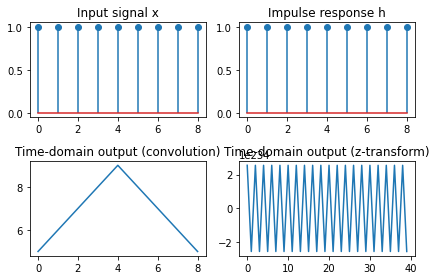

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signals
# x = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
x = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
h = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of x at the current value of z
        Xz = np.sum(x * (z ** (-np.arange(len(x)))))
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the input signals
X = z_transform(x)
H = z_transform(h)

# Calculate the z-transform of the convolution of x and h
Y = X * H

# Compute the inverse z-transform of Y to obtain the time-domain output signal y
y = np.real(np.fft.ifft(Y))

# Compute the convolution of x and h in the time domain
y_conv = np.convolve(x, h, mode='same')

# Plot the input signals and the time-domain and z-domain outputs
plt.subplot(2, 2, 1)
plt.stem(x)
plt.title('Input signal x')
plt.subplot(2, 2, 2)
plt.stem(h)
plt.title('Impulse response h')
plt.subplot(2, 2, 3)
plt.plot(y_conv)
plt.title('Time-domain output (convolution)')
plt.subplot(2, 2, 4)
plt.plot(y)
plt.title('Time-domain output (z-transform)')
plt.tight_layout()
plt.show()


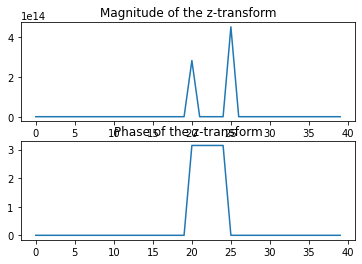

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the difference equation
a = np.array([1, -0.5])
b = np.array([1, 0, 0.25])

# Define the z-transform function
def z_transform(b, a):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of the difference equation at the current value of z
        num = np.sum(b * (z ** (-np.arange(len(b)))))
        den = np.sum(a * (z ** (-np.arange(len(a)))))
        Xz = num / den
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the difference equation
X = z_transform(b, a)

# Plot the magnitude and phase of the z-transform
plt.subplot(2, 1, 1)
plt.plot(np.abs(X))
plt.title('Magnitude of the z-transform')
plt.subplot(2, 1, 2)
plt.plot(np.angle(X))
plt.title('Phase of the z-transform')
plt.show()
